# Medical Cost Personal Insurance Project
Project Description Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region medical insurance is calculated . Columns
• age: age of primary beneficiary • sex: insurance contractor gender, female, male • bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. • children: Number of children covered by health insurance / Number of dependents • smoker: Smoking • region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. • charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link- https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Based on the results from info, we see that there are no null values in the data and the different data types of the columns

In [5]:
# General statistical description of Numerical variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Based on the results from describe, there seems to be a data that are categorical in nature, but are assigned as integer/float data type.

# Visualizing The Data
Distribution of charges

C:\Users\h.p\AppData\Local\Temp\ipykernel_8356\2590887679.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.charges, color = 'b')
C:\Users\h.p\AppData\Local\Temp\ipykernel_8356\2590887679.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df.charges), color = 'b')


<Axes: xlabel='charges', ylabel='Density'>

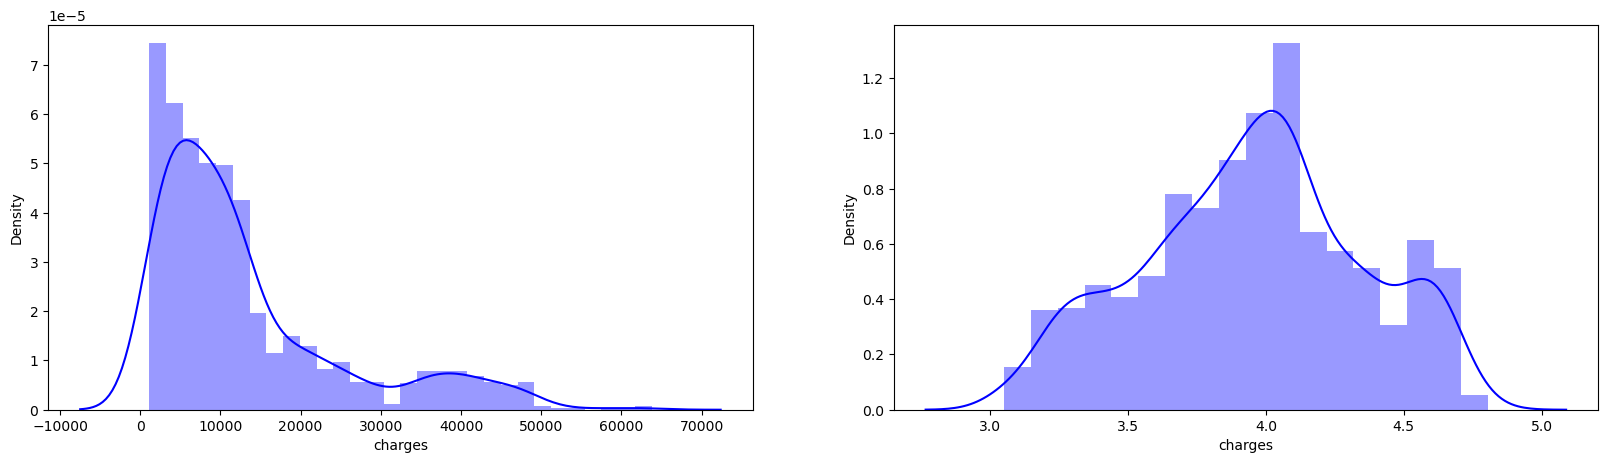

In [6]:
# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges, color = 'b')

# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges), color = 'b')

Note: The distribution of the charges is skewed to the right, so we applied natural log for ~ normal distribution.



# Visualizing distribution of numerical variables vs medical charges

C:\Users\h.p\AppData\Local\Temp\ipykernel_8356\4286400837.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, color = 'b').set_title('Distribution of age')
C:\Users\h.p\AppData\Local\Temp\ipykernel_8356\4286400837.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.bmi, color = 'b').s

Text(0.5, 1.0, 'Distribution of BMI')

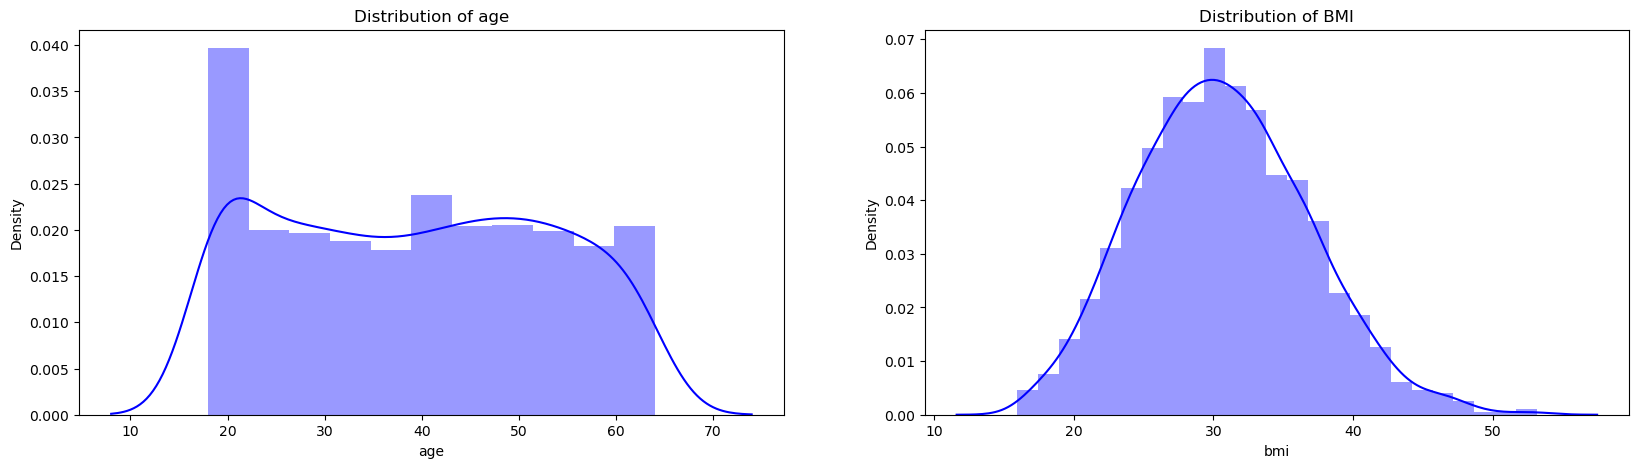

In [7]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.age, color = 'b').set_title('Distribution of age')

plt.subplot(1,2,2)
sns.distplot(df.bmi, color = 'b').set_title('Distribution of BMI')

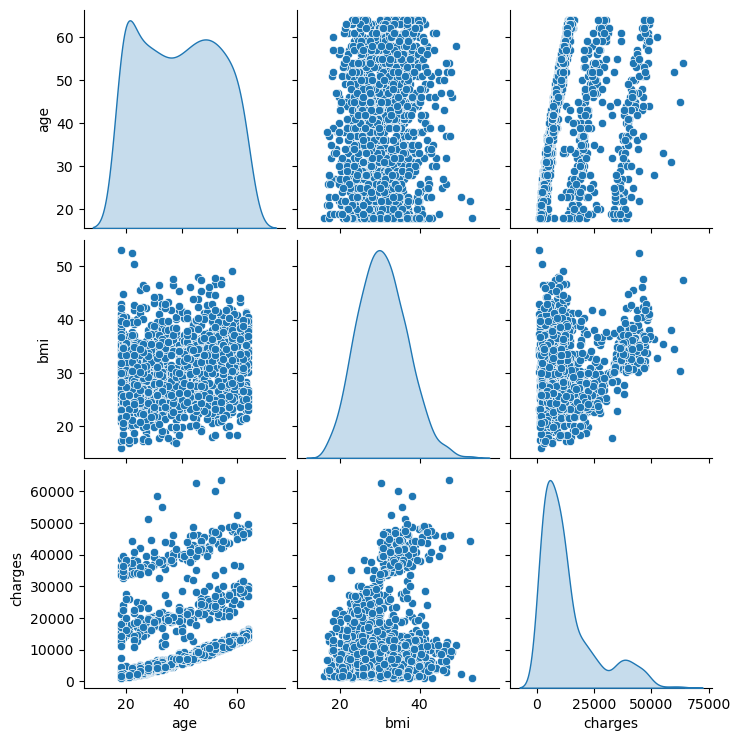

In [8]:
# Pairplot for Age, BMI, Charges
df_num = df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind = 'kde')
plt.show()

The pairplot reveals that there is a linear relationship between age, bmi with charges

# Visualizing categorical variables individually vs medical charges¶

<Axes: xlabel='smoker', ylabel='charges'>

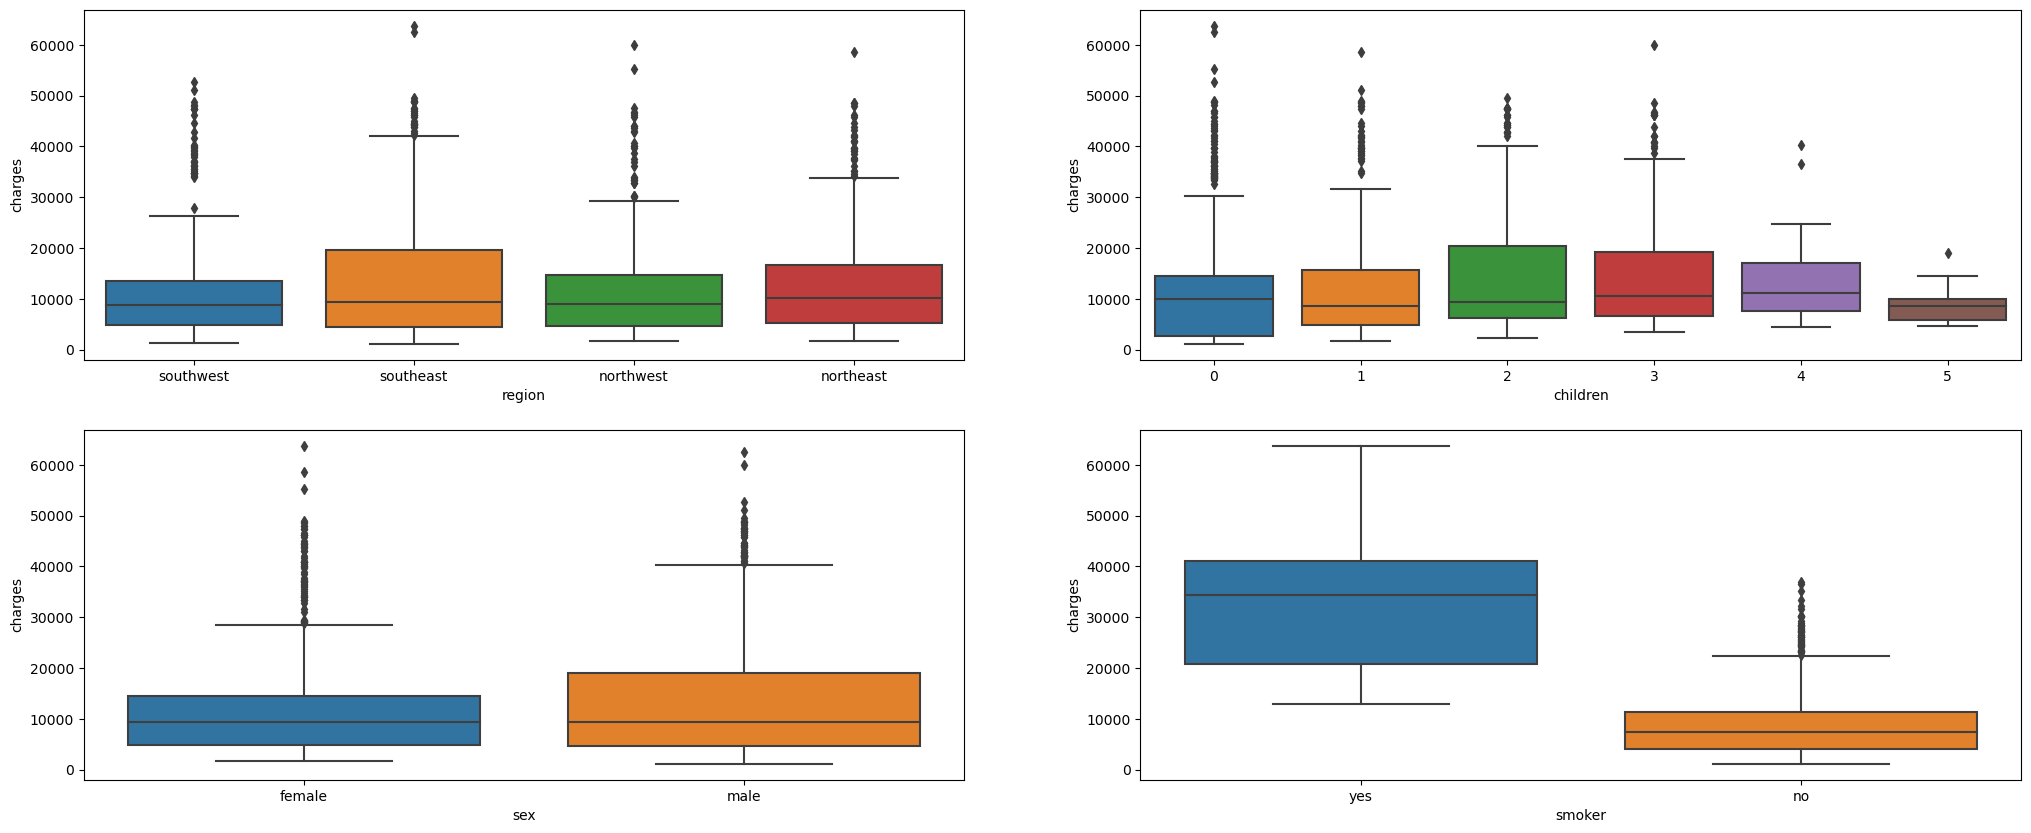

In [9]:
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)

Based on the box plots above, we can derive some inferences on the categorical variables:

Region: Compared to all regions, Southeast region has the highest data distribution between the 50th and 75th percentile.

Children: Among all the others, individuals with 2 children have the highest distribution between the 50th and 75th percentile.

Gender: The data is a little bit biased towards males as the interquartile range for male is higher compare to that for female. The data representation for male to female is 50.5 to 49.5.

Smoking behavior: Approximately 21% of our data comprises of smokers. The median is high for smokers, in comparison to those that do not smoke.

Now that we have looked at the effect of individual variables on medical charges, let's look at effect of a combination of factors on medical charges.

# Bi-Variate Analysis
Charges by region

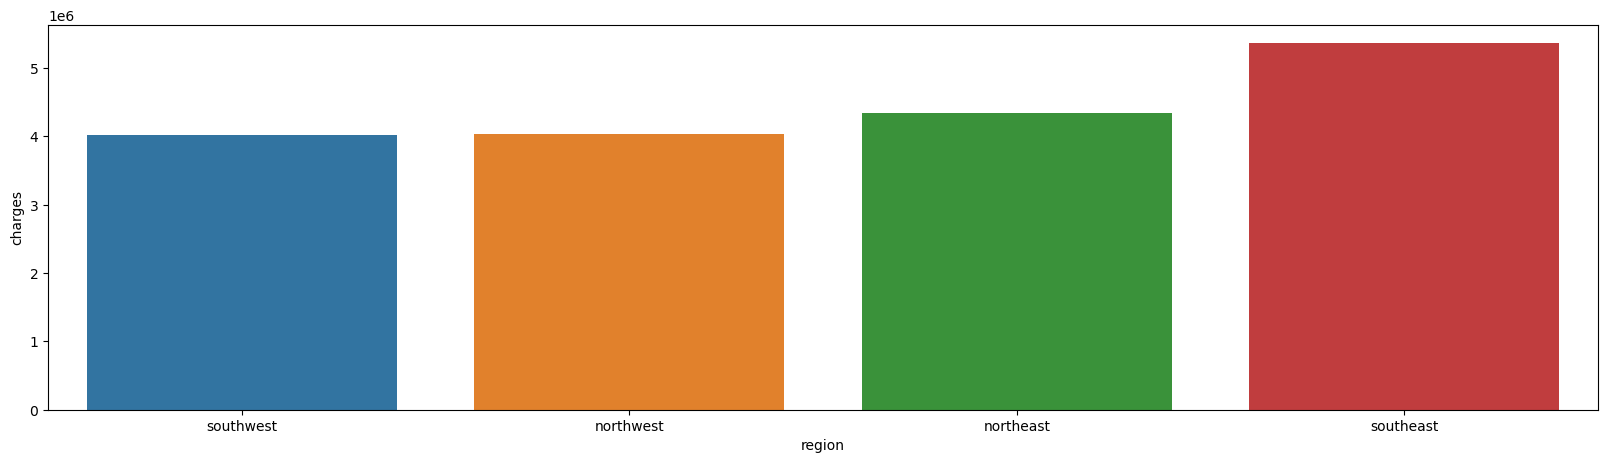

In [10]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

The highest amount of charges are in the Southeast while the lowest are in the Southwest. Based on this, let's see how charges change by region when accounting for other factors, such as number of children, gender, and smoking behavior.

# Charges by region and number of children

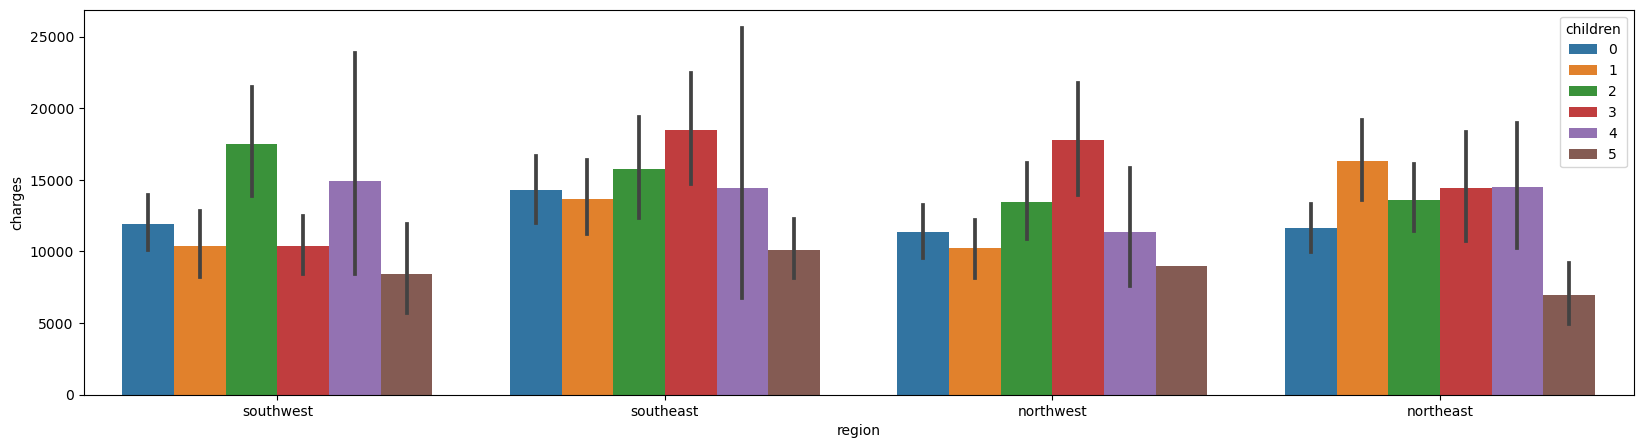

In [11]:
# Setting children as hue parameter
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)

It seems that there is not a statistical difference in terms of how the number of children in a particular region affects charges.

# Charges by region and gender

<Axes: xlabel='region', ylabel='charges'>

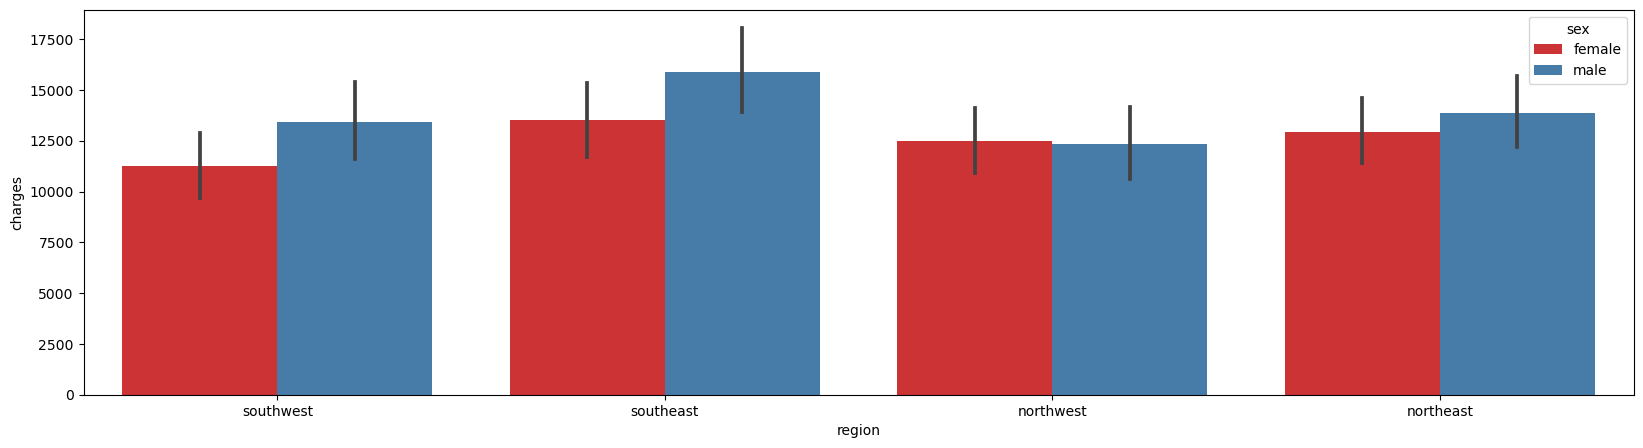

In [12]:
# setting Sex as Hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'Set1')

Again, similar to the previous graph, it seems that there is not a statistical difference in terms of how gender in a particular region affects charges.

# Charges by region and smoking behavior

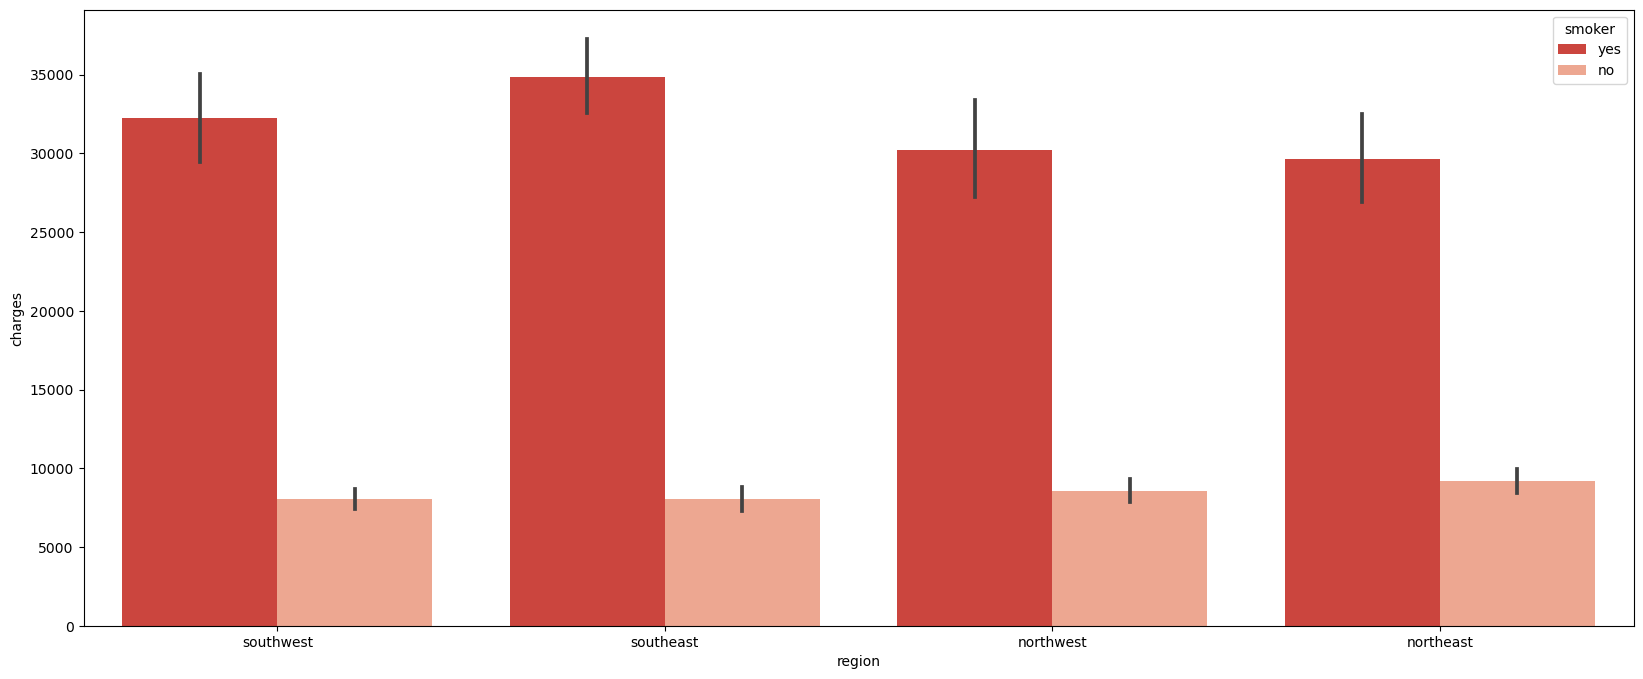

In [13]:
f, ax = plt.subplots(1, 1, figsize = (20, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Reds_r')

In contrast to the other factors, there seems to be a statistical significance in terms of how smoking behavior in a region affects charges.

From these bar charts, we can see that smoking behavior by region significantly affected medical charges. So, let's see the correlation between non-categorical variables (age, bmi, and children) with medical charges (evaluated based on smoking behavior).

# Charges by age, bmi, and children based on smoking behavior¶

Text(0.5, 1.0, 'Number of children vs Medical Charges')

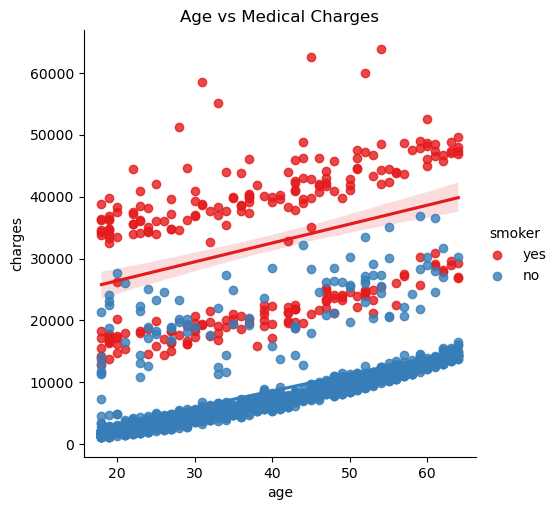

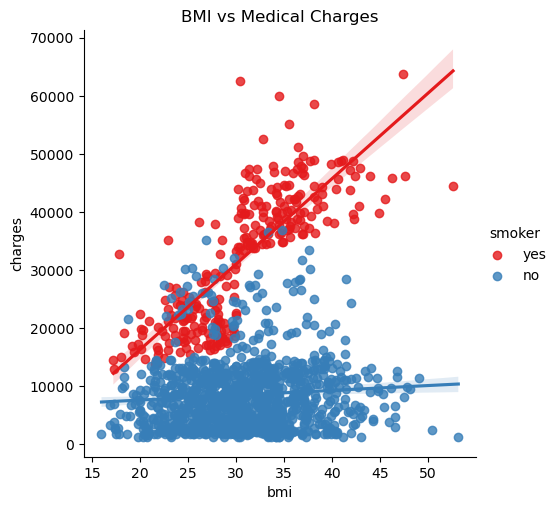

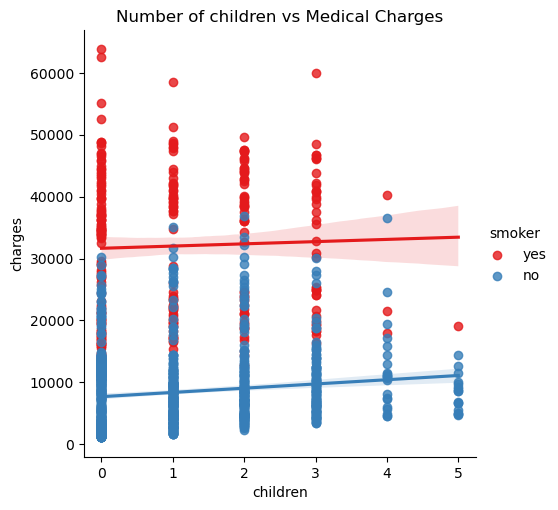

In [14]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

Based on the analysis,

We know that smoking has a great impact on medical costs. Smoking in combination with an increase in other factors, such as age, bmi, and children, further emphasizes and increases the medical cost due to smoking.

# Data Correlation
To confirm our findings, let's look at the correlation between all the columns by constructing a pairplot and correlation heatmap.

In order to do so, we need to first convert all object labels into categorical variables and then convert them to numerical values.

In [15]:
# Converting data to categorical type data
df[['region','sex','smoker']]= df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [16]:
# Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

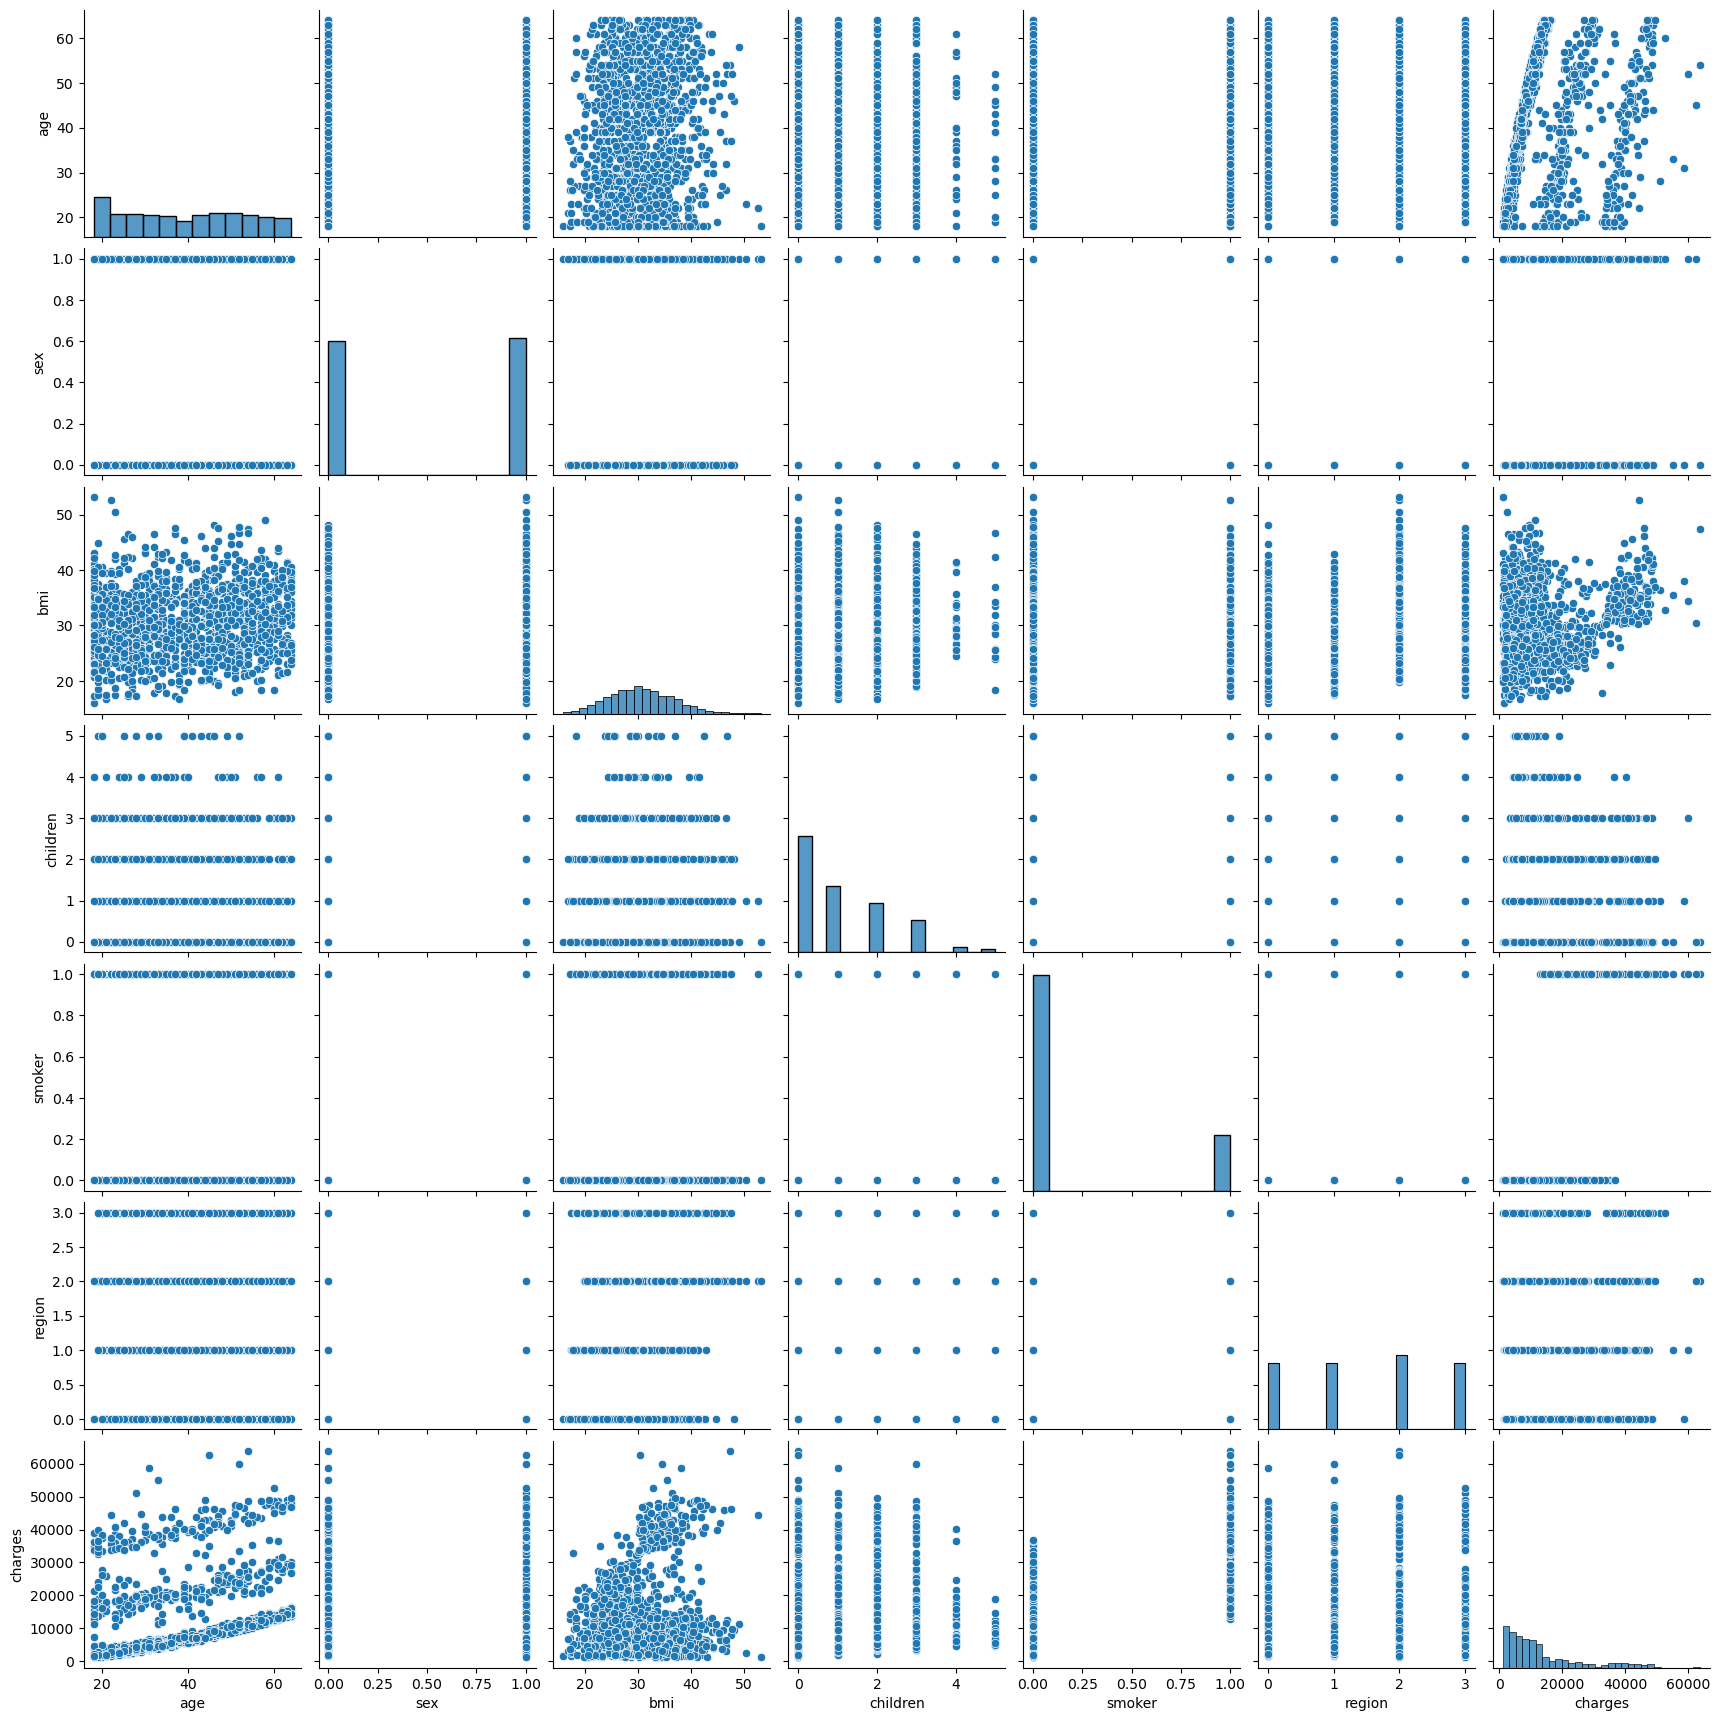

In [17]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

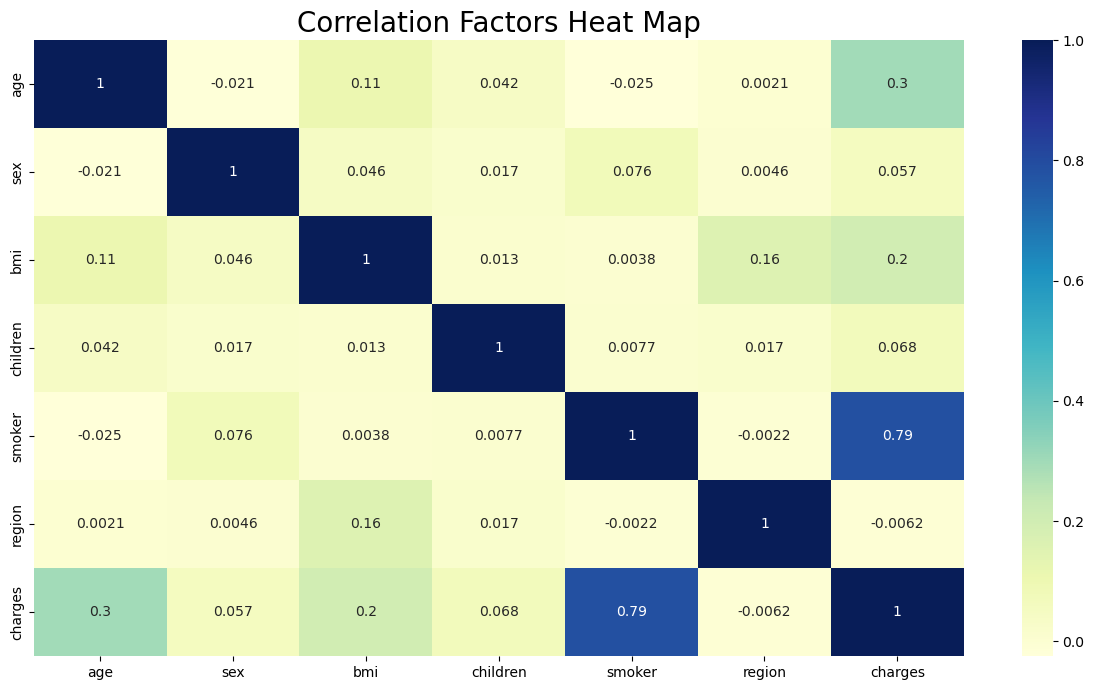

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

The heatmap shows the variables that are multicollinear in nature and the variables that have high collinearity with the target varible (charges).
This reveals that smoking behavior, followed by age and bmi, are greatly correlated with medical charges.

# Preparing Data for Machine Learning

Now that we understand our dataset, it is time to apply machine learning methods to predict future insurance cost of patients based on several factors.

First, we have to prepare our data by splitting it into training and testing data.

In [19]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
features = df.drop(['charges'], axis = 1)
targets = df['charges']

In [21]:
x_train, x_test, y_train, y_test = holdout(features, targets, test_size = 0.2, random_state = 0)

# Machine Learning
The goal is to determine the insurance cost for an individual based on several factors. Therefore, this is a regression case. Regression models a target prediction value based on independent variables. We will use the following algorithms -

Linear Regression

Random Forest Regressor

Polynomial Regression

# 1. Linear Regression

In [22]:
Lin_reg_model = LinearRegression()
Lin_reg_model.fit(x_train, y_train)

print('Intercept:', Lin_reg_model.intercept_)
print('Coefficients:', Lin_reg_model.coef_)

Intercept: -11661.983908824417
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [23]:
from sklearn.metrics import r2_score, mean_squared_error

Lin_reg_model_train_pred = Lin_reg_model.predict(x_train)
Lin_reg_model_test_pred = Lin_reg_model.predict(x_test)

# Mean squared error
Lin_reg_model_train_mse = mean_squared_error(y_train, Lin_reg_model_train_pred)
Lin_reg_model_test_mse = mean_squared_error(y_test, Lin_reg_model_test_pred)
print('MSE train data: {:.3}, \nMSE test data: {:.3}\n'.format(Lin_reg_model_train_mse, Lin_reg_model_test_mse))

# Root Mean Squared error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(Lin_reg_model_train_mse)), 
    np.sqrt(np.absolute(Lin_reg_model_train_mse))))

# R^2 - coefficient of determination
print('R2 train data: {:.3}, \nR2 test data: {:.3}\n'.format(
    r2_score(y_train,Lin_reg_model_train_pred),
    r2_score(y_test,Lin_reg_model_test_pred)))

# Model Score
print('Model Score:', Lin_reg_model.score(x_test, y_test))

MSE train data: 3.77e+07, 
MSE test data: 3.18e+07

RMSE train data: 6.14e+03, 
RMSE test data: 6.14e+03

R2 train data: 0.737, 
R2 test data: 0.8

Model Score: 0.7998747145449958


# The model score we achieved generates a relatively good prediction; however, we can improve the model by potentially disregarding umimportant independent variables.

# Random Forest Regressor

In [1]:
from sklearn.ensemble import RandomForestRegressor as rfr

RFR = rfr(n_estimators = 100, criterion = 'mse', random_state = 0, n_jobs = -1)
RFR.fit(x_train, y_train)

x_train_predic = RFR.predict(x_train)
x_test_predic = RFR.predict(x_test)

# Mean squared error
train_mse = metrics.mean_squared_error(x_train_predic, y_train)
test_mse = metrics.mean_squared_error(x_test_predic, y_test)
print('Mean Squared Error train data: %.3f\nMean Squared Error test data: %.3f\n' % (train_mse, test_mse))

# Root Mean Squares error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(train_mse)), 
    np.sqrt(np.absolute(train_mse))))

# R^2 - coefficient of determination
print('R2 train data: %.3f\nR2 test data: %.3f\n' % (metrics.r2_score(x_train_predic, y_train),metrics.r2_score(x_test_predic, y_test)))

# Model Score
print('Model Accuracy Score:', (RFR.score(x_test, y_test))*100)

NameError: name 'x_train' is not defined

In [3]:
## Plotting actual vs predicted values from random forest regressor

plt.figure(figsize = (6, 4))

# Train data
plt.scatter(x_train_predic, x_train_predic - y_train, c = 'red', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
# Test data
plt.scatter(x_test_predic, x_test_predic - y_test, c = 'blue', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')

# plt.xlabel("Predicted values")
plt.ylabel('Actual values')
plt.legend(loc = 'upper left')

NameError: name 'plt' is not defined

# Feature Importance Ranking 

In [4]:
importances = RFR.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFR.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]
variables = ['age', 'sex','bmi', 'children','smoker','region']

imp_list = []
for value in range(features.shape[1]):
    variable = variables[indices[value]]
    imp_list.append(variable)
    print('%d.%s(%f)' % (value + 1, variable, importances[indices[value]]))
    
# Plotting the feature importances
plt.figure()
plt.title('Importance of features in determining medical charges')
plt.bar(imp_list, importances[indices], color = 'b', yerr = std[indices], align = 'center')

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
features = df.drop(['charges','sex','region'], axis = 1)
target = df.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(features)
x_train, x_test, y_train, y_test = holdout(x_pol, target, test_size = 0.2, random_state = 0)

NameError: name 'df' is not defined

In [6]:
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_predic = Pol_reg.predict(x_train)
y_test_predic = Pol_reg.predict(x_test)

print('Intercept:', Pol_reg.intercept_)
print('Coefficients:', Pol_reg.coef_)

# Model Score
print('\nModel Accuracy Score:', (Pol_reg.score(x_test, y_test))*100)

NameError: name 'LinearRegression' is not defined

In [7]:
#Independent variables
features.head()

NameError: name 'features' is not defined

In [9]:
#Predicting the Medical Charges
y_test_predic= Pol_reg.predict(x_test)

# Creating a dataframe for comparing the Actual Values with the Predicted Values
final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_test_predic})
final_values

NameError: name 'Pol_reg' is not defined